##Tirmzi Analysis
n=1000 m+=1000 nm-=120 istep= 4 min=150 max=700

In [1]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal

In [2]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data\Output-Python

09/07/2021  09:51 AM    <DIR>          .
09/07/2021  09:51 AM    <DIR>          ..
09/07/2021  09:49 AM    <DIR>          .ipynb_checkpoints
08/31/2021  10:49 AM    <DIR>          0307-testinputfile4-0004
08/31/2021  10:48 AM    <DIR>          0308-testinputfile4-0004
08/31/2021  10:48 AM    <DIR>          0309-VariedNuni_8_2_2021-0000
08/31/2021  10:49 AM    <DIR>          0310-VariedNuni_8_2_2021-0000
08/31/2021  10:48 AM    <DIR>          0311-VariedNuni_8_2_2021-0001
08/31/2021  10:49 AM    <DIR>          0312-VariedNuni_8_2_2021-0001
08/31/2021  10:48 AM    <DIR>          0313-VariedNuni_8_2_2021-0002
08/31/2021  10:49 AM    <DIR>          0314-VariedNuni_8_2_2021-0002
08/31/2021  10:48 AM    <DIR>          0315-er_equal_1-0002
08/31/2021  10:49 AM    <DIR>          0316-er_equal_1-0002
08/31/2021  10

In [3]:
import capsol.newanalyzecapsol as ac

In [4]:
ac.get_gridparameters

<function capsol.newanalyzecapsol.get_gridparameters(f_name)>

In [5]:
import glob

In [6]:
folders = glob.glob("*NewTirmzi_variedepsr_75075090*/")
folders


['0376-NewTirmzi_variedepsr_75075090-0000\\',
 '0378-NewTirmzi_variedepsr_75075090-0002\\',
 '0390-NewTirmzi_variedepsr_75075090-0001\\']

In [7]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'C-Z.dat')
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9, fortran=False)
    all_data[folder]= (process_data)
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [8]:
all_data

{'0376-NewTirmzi_variedepsr_75075090-0000\\': {'z': array([100., 102., 104., 106., 108., 110., 112., 114., 116., 118., 120.,
         122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
         144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164.,
         166., 168., 170., 172., 174., 176., 178., 180., 182., 184., 186.,
         188., 190., 192., 194., 196., 198., 200., 202., 204., 206., 208.,
         210., 212., 214., 216., 218., 220., 222., 224., 226., 228., 230.,
         232., 234., 236., 238., 240., 242., 244., 246., 248.]),
  'c': array([1.67039172e-15, 1.67016444e-15, 1.66993821e-15, 1.66971300e-15,
         1.66948878e-15, 1.66926554e-15, 1.66904324e-15, 1.66882187e-15,
         1.66860140e-15, 1.66838182e-15, 1.66816309e-15, 1.66794522e-15,
         1.66772817e-15, 1.66751193e-15, 1.66729648e-15, 1.66708181e-15,
         1.66686790e-15, 1.66665474e-15, 1.66644231e-15, 1.66623060e-15,
         1.66601960e-15, 1.66580929e-15, 1.66559966e-15, 1.665390

In [9]:
all_data.keys()

dict_keys(['0376-NewTirmzi_variedepsr_75075090-0000\\', '0378-NewTirmzi_variedepsr_75075090-0002\\', '0390-NewTirmzi_variedepsr_75075090-0001\\'])

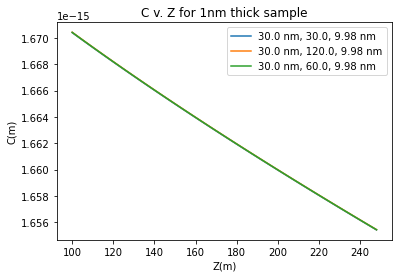

In [20]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 9.98}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")

cut off last experiment because capacitance was off the scale

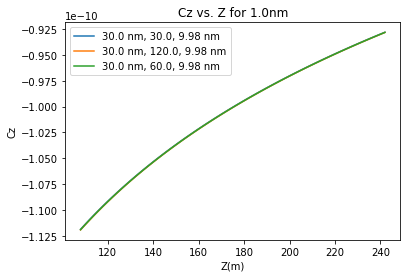

In [11]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 9.98}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

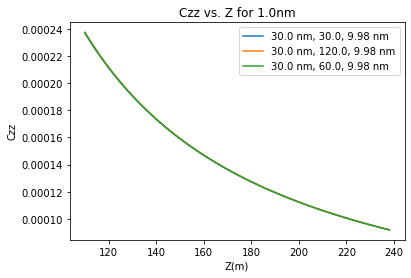

In [12]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 9.98}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [13]:
params

{'n': 750,
 'm+': 750,
 'm-': 88,
 'h0': 0.5,
 'rho_max': 1000000.0,
 'z_max': 1000000.0,
 'min': 100.0,
 'max': 249.99,
 'istep': 4.0,
 'Rtip': 30.0,
 'half-angle': 20.0,
 'HCone': 11999.99,
 'RCantilever': 13750.0,
 'thickness_Cantilever': 1000.01,
 'eps_r': 60.0,
 'Thickness_sample': 9.98,
 'Solving Method': 'LAPACK',
 'Test': 0,
 'Verbosity': 0,
 'Nuni': 1,
 'Equally spaced': True}

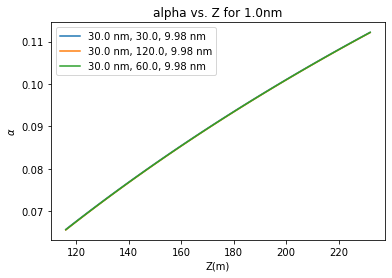

In [14]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 9.98}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

In [15]:
data

{'z': array([100., 102., 104., 106., 108., 110., 112., 114., 116., 118., 120.,
        122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
        144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164.,
        166., 168., 170., 172., 174., 176., 178., 180., 182., 184., 186.,
        188., 190., 192., 194., 196., 198., 200., 202., 204., 206., 208.,
        210., 212., 214., 216., 218., 220., 222., 224., 226., 228., 230.,
        232., 234., 236., 238., 240., 242., 244., 246., 248.]),
 'c': array([1.67040975e-15, 1.67018239e-15, 1.66995608e-15, 1.66973079e-15,
        1.66950649e-15, 1.66928317e-15, 1.66906080e-15, 1.66883936e-15,
        1.66861882e-15, 1.66839917e-15, 1.66818038e-15, 1.66796244e-15,
        1.66774532e-15, 1.66752902e-15, 1.66731351e-15, 1.66709878e-15,
        1.66688481e-15, 1.66667159e-15, 1.66645910e-15, 1.66624734e-15,
        1.66603628e-15, 1.66582591e-15, 1.66561623e-15, 1.66540721e-15,
        1.66519886e-15, 1.66499115e-15, 1.66478408

In [16]:
from scipy.optimize import curve_fit


In [17]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [18]:
all_data.keys()

dict_keys(['0376-NewTirmzi_variedepsr_75075090-0000\\', '0378-NewTirmzi_variedepsr_75075090-0002\\', '0390-NewTirmzi_variedepsr_75075090-0001\\'])

In [19]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

KeyError: 'capsol-calc\\0001-capsol\\'

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)